<div align='center'><h2><b>Projet SES722 - Econométrie - MS BIG DATA</b></h2></div>

<div align='center'>- Romain LEGRAND, Rodolphe SIMONEAU -</div>
<br>
<div align='center'>10 avril 2020</div>


In [93]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Partie 1 : Régression Linéaire

#### Question 1 
Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [94]:
names = [
    'inlf',                    # =1 if in labor force, 1975
    'hours',                   # hours worked, 1975
    'kidslt6',                 # #kids < 6 years
    'kidsge6',                 # #kids 6-18
    'age',                     # woman's age in yrs
    'educ',                    # years of schooling
    'wage',                    # estimated wage from earns., hours
    'repwage',                 # reported wage at interview in 1976
    'hushrs',                  # hours worked by husband, 1975
    'husage',                  # husband's age
    'huseduc',                 # husband's years of schooling
    'huswage',                 # husband's hourly wage, 1975
    'faminc',                  # family income, 1975
    'mtr',                     # fed. marginal tax rate facing woman
    'motheduc',                # mother's years of schooling
    'fatheduc',                # father's years of schooling
    'unem',                    # unem. rate in county of resid.
    'city',                    # =1 if live in SMSA
    'exper',                   # actual labor mkt exper
    'nwifeinc',                # (faminc - wage*hours)/1000
    'lwage',                   # log(wage)
    'expersq',                 # exper^2
]

In [95]:
path = "MROZ.raw"
df = pd.read_csv(path, delim_whitespace=True, header=None,names=names)

In [96]:
df.shape

(753, 22)

In [97]:
df.dtypes

inlf          int64
hours         int64
kidslt6       int64
kidsge6       int64
age           int64
educ          int64
wage         object
repwage     float64
hushrs        int64
husage        int64
huseduc       int64
huswage     float64
faminc        int64
mtr         float64
motheduc      int64
fatheduc      int64
unem        float64
city          int64
exper         int64
nwifeinc    float64
lwage        object
expersq       int64
dtype: object

In [98]:
df["wage"] = pd.to_numeric(df["wage"], errors='coerce').fillna(0, downcast='infer')
df["lwage"] = pd.to_numeric(df["lwage"], errors='coerce').fillna(0, downcast='infer')

In [99]:
df2 = df[df["wage"]>0]

In [100]:
print("Il y avait " + str(df.shape[0]) + " lignes dans le dataframe avant la modification.")
print("En retirant toutes les lignes où le salaire est inférieur à 0, nous n'obtenons plus que " + str(df2.shape[0]) + " lignes dans le dataframe")

Il y avait 753 lignes dans le dataframe avant la modification.
En retirant toutes les lignes où le salaire est inférieur à 0, nous n'obtenons plus que 428 lignes dans le dataframe


#### Question 2 
Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure au 65ème percentile de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65ème percentile de l’échantillon. Commenter

##### Salaire, age et education pour l'ensemble des femmes

In [101]:
df2.wage.describe()

count    428.000000
mean       4.177682
std        3.310282
min        0.128200
25%        2.262600
50%        3.481900
75%        4.970750
max       25.000000
Name: wage, dtype: float64

In [102]:
df2.age.describe()

count    428.000000
mean      41.971963
std        7.721084
min       30.000000
25%       35.000000
50%       42.000000
75%       47.250000
max       60.000000
Name: age, dtype: float64

In [103]:
df2.educ.describe()

count    428.000000
mean      12.658879
std        2.285376
min        5.000000
25%       12.000000
50%       12.000000
75%       14.000000
max       17.000000
Name: educ, dtype: float64

##### Calcul du 65th quantile pour le salaire des maris sur l'échantillon

In [104]:
husband_65quantile = df2["huswage"].quantile(q=0.65)

##### Description de l'age, l'éducation, et le salaire pour les femmes dont les maris gagnent moins que le 65ème percentile

In [105]:
df3 = df2[df2["huswage"] <= husband_65quantile]

In [106]:
df3.wage.describe()

count    280.000000
mean       3.669390
std        2.458277
min        0.128200
25%        2.151600
50%        3.203550
75%        4.539500
max       22.500000
Name: wage, dtype: float64

In [107]:
df3.age.describe()

count    280.000000
mean      41.682143
std        7.906875
min       30.000000
25%       35.000000
50%       41.000000
75%       47.000000
max       60.000000
Name: age, dtype: float64

In [108]:
df3.educ.describe()

count    280.000000
mean      12.203571
std        2.119542
min        6.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       17.000000
Name: educ, dtype: float64

##### Description de l'age, l'éducation, et le salaire pour les femmes dont les maris gagnent plus que le 65ème percentile

In [109]:
df4 = df2[df2["huswage"] > husband_65quantile]

In [110]:
df3.wage.describe()

count    280.000000
mean       3.669390
std        2.458277
min        0.128200
25%        2.151600
50%        3.203550
75%        4.539500
max       22.500000
Name: wage, dtype: float64

In [111]:
df4.age.describe()

count    148.00000
mean      42.52027
std        7.35168
min       30.00000
25%       36.00000
50%       43.00000
75%       48.00000
max       59.00000
Name: age, dtype: float64

In [112]:
df3.educ.describe()

count    280.000000
mean      12.203571
std        2.119542
min        6.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       17.000000
Name: educ, dtype: float64

#### Question 3
Faire l'histogramme de la variable wage. Supprimer les observations qui sont à plus de 3 écart-types de la moyenne et refaire l’histogramme

(array([15., 30., 62., 68., 58., 50., 43., 26., 14., 16.,  8., 13.,  3.,
         6.,  4.,  0.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  2.]),
 array([ 0.1282    ,  0.83882286,  1.54944571,  2.26006857,  2.97069143,
         3.68131429,  4.39193714,  5.10256   ,  5.81318286,  6.52380571,
         7.23442857,  7.94505143,  8.65567429,  9.36629714, 10.07692   ,
        10.78754286, 11.49816571, 12.20878857, 12.91941143, 13.63003429,
        14.34065714, 15.05128   , 15.76190286, 16.47252571, 17.18314857,
        17.89377143, 18.60439429, 19.31501714, 20.02564   , 20.73626286,
        21.44688571, 22.15750857, 22.86813143, 23.57875429, 24.28937714,
        25.        ]),
 <a list of 35 Patch objects>)

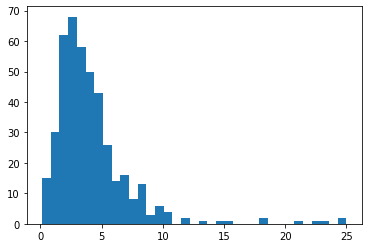

In [113]:
# histogramme de la variable wage 
plt.hist(df2["wage"],'auto')

In [114]:
ecart_type_wage = df2["wage"].std(ddof=0)
moyenne_wage = df2["wage"].mean()
print(ecart_type_wage)
print(moyenne_wage)

3.3064129736891417
4.177681542056075


In [115]:
df5 = df2[df2["wage"]<(moyenne_wage+ecart_type_wage*3)]

(array([14., 28., 55., 66., 51., 58., 44., 27., 16., 13., 12.,  9., 10.,
         4.,  5.,  4.,  0.,  2.,  0.,  1.]),
 array([ 0.1282 ,  0.79949,  1.47078,  2.14207,  2.81336,  3.48465,
         4.15594,  4.82723,  5.49852,  6.16981,  6.8411 ,  7.51239,
         8.18368,  8.85497,  9.52626, 10.19755, 10.86884, 11.54013,
        12.21142, 12.88271, 13.554  ]),
 <a list of 20 Patch objects>)

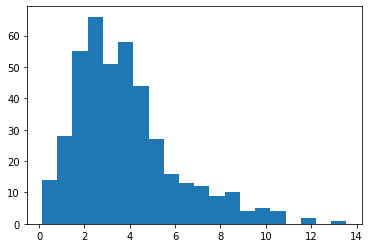

In [116]:
# histogramme de la variable wage réajustée
plt.hist(df5["wage"],'auto')

#### Question 4
Calculer les corrélations motheduc et fatheduc. Expliquer le problème de multi-collinéarité. Commenter.

In [117]:
np.corrcoef(df2["motheduc"],df2["fatheduc"])

array([[1.        , 0.55406322],
       [0.55406322, 1.        ]])

La corrélation est de 55% entre l'éducation de la mère et celle du père.

#### Question 5
Faites un graphique en nuage de point entre wage et educ,. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

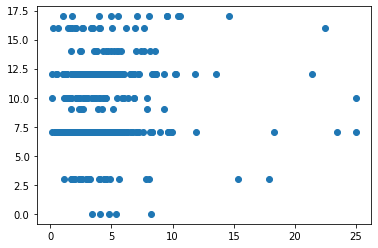

In [118]:
plt.scatter(df2.wage, df2.fatheduc)

#### Question 6
Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.

- L'hypothèse de normalité des résidus garantit l'obtention du meilleur estimateur linéaire non-biaisé (BLUE). Ainsi, les résidus sont centrés en zéro, de variance constante à travers le temps (iid). On parle alors d'homoscedasticité.
- On estime un modèle en prenant certaines variables, mais il en existent d'autres, que l'on ne peut pas contrôler par manque de données. Une variable omise contrarit l'hypothèse de normalité des résidus, car l'effet des variables omises se retrouve en partie dans les résidus.

#### Question 7
Faire la régression du log de wage en utilisant comme variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

(array([ 2.,  1.,  1.,  1.,  1.,  1.,  3.,  2.,  3.,  5.,  5., 10., 16.,
        27., 38., 46., 58., 67., 56., 37., 26.,  5.,  7.,  1.,  3.,  1.,
         1.,  1.,  3.]),
 array([-3.00985153, -2.82773465, -2.64561777, -2.46350089, -2.281384  ,
        -2.09926712, -1.91715024, -1.73503336, -1.55291648, -1.37079959,
        -1.18868271, -1.00656583, -0.82444895, -0.64233206, -0.46021518,
        -0.2780983 , -0.09598142,  0.08613546,  0.26825235,  0.45036923,
         0.63248611,  0.81460299,  0.99671988,  1.17883676,  1.36095364,
         1.54307052,  1.72518741,  1.90730429,  2.08942117,  2.27153805]),
 <a list of 29 Patch objects>)

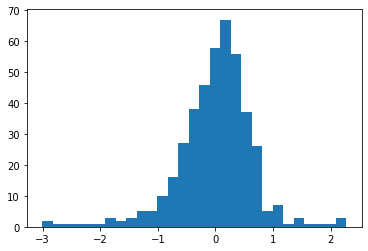

In [119]:
y = df2["lwage"]
s = np.shape(df2["lwage"])
const = np.ones(s)
city = df2["city"]
educ = df2["educ"]
exper = df2["exper"]
nwifeinc = df2["nwifeinc"]
kidslt6 = df2["kidslt6"]
kidsge6 = df2["kidsge6"]
X = np.column_stack((const,city,educ,exper,nwifeinc,kidslt6,kidsge6))
beta = np.linalg.inv(X.T @ X)@X.T@y
u = y - X@beta 
plt.hist(u,'auto')

Les résidus ne sont pas gaussiens mais sont bien centrés en 0. 

#### Question 8 
Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

In [123]:
n,k = np.shape(X)
sig2 = u.T@u/(n-k)
Var = sig2 * np.linalg.inv(X.T @ X)
std = np.sqrt(np.diag(Var))
t = beta / std 
t_nwifeinc = t[4]

In [125]:
print(t)

[-1.92694669  0.50254687  6.77056179  3.45171828  1.46595149 -0.53105232
 -0.43435775]


In [126]:
print(t_nwifeinc)

1.4659514850330582


In [127]:
for t in [1,5,10]:
    print("Au seuil de significativité de " + str(t) + "%")
    t_stat = 2 * stats.t.isf(t/200, n-k)
    if t_stat < t_nwifeinc:
        print("On rejette l'hypothèse de non-significativité")
    else: 
        print("On accepte l'hypothèse de non-significativité")
    print('p_value :', 2 * stats.t.sf(t_stat,n-k), '\n')

Au seuil de significativité de 1%
On accepte l'hypothèse de non-significativité
p_value : 3.5333096948479134e-07 

Au seuil de significativité de 5%
On accepte l'hypothèse de non-significativité
p_value : 9.878952107382961e-05 

Au seuil de significativité de 10%
On accepte l'hypothèse de non-significativité
p_value : 0.0010602435910751766 



#### Question 9
Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)

#### Question 10 
Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.

In [64]:
Y = df2['lwage']
X = df2[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]

In [70]:
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_n = np.sum(ols.resid ** 2)
ddl_n = df.shape[0] - X.shape[1] - 1
# Modèle contraint
Y = df2['lwage'] - 0.01 * df2['nwifeinc'] - 0.05 * df2['city']
X = df2[['exper','educ', 'kidslt6', 'kidsge6']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_c = np.sum(ols.resid ** 2)
ddl_c = df.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1- stats.f.cdf(F, ddl_c - ddl_n, ddl_n)

print("La p_value est de : {}%".format(100*p_val))

La p_value est de : 9.425439389224987%


La p-value est supérieure à 0.05 : on ne rejette pas l'hypothèse jointe.

#### Question 11
Tester l’hypothèse joint que beta_nwifeinc+beta_city=0.1 et beta_educ+beta_exper=0.1

In [73]:
# Modèle non contraint
Y = df2['lwage']
X = df2[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_n = np.sum(ols.resid ** 2)
ddl_n = df.shape[0] - X.shape[1] - 1

# Modèle contraint
Y = df2.lwage - 0.1 * (df2.nwifeinc + df2.city) - 0.1 * (df2.educ + df2.exper)
X = df2[['kidslt6', 'kidsge6']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_c = np.sum(ols.resid ** 2)
ddl_c = df.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1- stats.f.cdf(F, ddl_c - ddl_n, ddl_n)

print("La p_value est de : {}%".format(100*p_val))

La p_value est de : 1.1102230246251565e-14%


La p-value est inférieure à 0.05 : on rejette l'hypothèse jointe.

#### Question 12 
Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation
et l’expérience professionnelle. Commentez

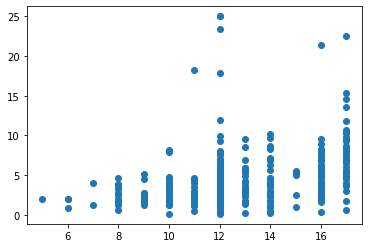

In [39]:
plt.scatter(df2.educ,df2.wage)
plt.show()

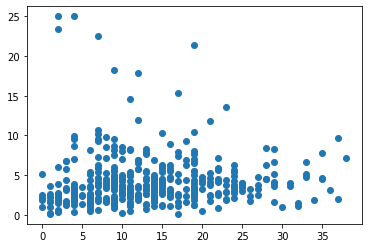

In [40]:
plt.scatter(df2.exper,df2.wage)
plt.show()

#### Question 13 
Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez

In [41]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']
formula = 'lwage ~ ' + ' + '.join(cols)
cols.append('lwage')
data = df2[cols].assign(const=1)
X = df2[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6', 'lwage']]
X = X.assign(const=1)
formula = 'lwage ~ city + educ + exper + nwifeinc + kidslt6 + kidsge6 + const'
results = ols(formula, data).fit()

hypotheses = '(kidsge6 = kidslt6)'
f_test = results.f_test(hypotheses)
f_test.summary()

'<F test: F=array([[0.13819611]]), p=0.7102679748433033, df_denom=421, df_num=1>'

#### Question 14 
Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [80]:
X = df2[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
Y = df2.wage
results = sm.OLS(Y, sm.add_constant(X)).fit()
u2 = results.resid ** 2

# Modèle non contraint
Y = u2.copy()
X = df2[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_n = np.sum(ols.resid ** 2)
ddl_n = X.shape[0] - X.shape[1] - 1

# Modèle contraint
X = np.ones((df2.shape[0], 1))

ols_2 = sm.OLS(Y, X).fit()
SSR_c = np.sum(ols_2.resid ** 2)
ddl_c = X.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1 - stats.f.cdf(F, ddl_c - ddl_n, ddl_n)

print("p_valeur : {}".format(p_val))

p_valeur : 0.09130097553302974


On obtient une p-value de 9.1%, qui implique un rejet de l'hypothèse à 10% mais une non-rejet à 5%.

In [89]:
Y = np.log(u2)
X = df2[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
model = sm.OLS(Y, sm.add_constant(X)).fit()

g = np.dot(sm.add_constant(X), model.params)
w = np.sqrt(np.exp(g))
Y = u2.copy() / w
df_weight = df2.copy()

for col in ['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6'] :
    df_weight[col] = df_weight[col]/w 
    
# Modèle contraint
X = df_weight[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]

model = sm.OLS(Y, sm.add_constant(X))
ols = model.fit()

SSR_n = np.sum(ols.resid ** 2)
ddl_n = X.shape[0] - X.shape[1] - 1

# Modèle contraint
X = np.ones((df_weight.shape[0], 1))

ols_2 = sm.OLS(Y, X).fit()
SSR_c = np.sum(ols_2.resid ** 2)
ddl_c = X.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1 - stats.f.cdf(F, ddl_c - ddl_n, ddl_n)

print("p_valeur : {}".format(p_val))

p_valeur : 0.6271456383048674


La p-value est désormais de 63%, ce qui implique que l'on ne peut pas rejeter l'hypothèse d'homoscedasticité des résidus. On a bien corrigé le problème d'hétéroscedasticité.

#### Question 15 
Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs


In [81]:
df_grp1 = df2[df.age > 43]
df_grp2 = df2[(df.age <= 43)]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [82]:
X = sm.add_constant(df_grp1[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model = sm.OLS(df_grp1.lwage.apply(float), X)
resultats_structure = model.fit()
print(resultats_structure.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     5.925
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.15e-05
Time:                        15:04:29   Log-Likelihood:                -179.89
No. Observations:                 186   AIC:                             373.8
Df Residuals:                     179   BIC:                             396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3232      0.276     -1.173      0.2

In [83]:
X = sm.add_constant(df_grp2[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']])
model = sm.OLS(df_grp2.lwage.apply(float), X)
resultats_structure = model.fit()
print(resultats_structure.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     7.888
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           9.37e-08
Time:                        15:04:40   Log-Likelihood:                -248.69
No. Observations:                 242   AIC:                             511.4
Df Residuals:                     235   BIC:                             535.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5412      0.318     -1.702      0.0

In [84]:
print("p_value : {}".format(stats.ttest_ind(df_grp1.lwage, df_grp2.lwage)[1]))

p_value : 0.6856897347649491


On ne rejette pas l'hypothèse d'indépendance : on ne peut pas conclure à un effet significatif de l'âge.

#### Question 16 
Ajouter au modèle de la question 7 la variable huseduc. Faire ensuite la même régression en décomposant la variable huseduc en 4 variables binaires construites selon votre choix. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez.

In [86]:
huseduc_cat = pd.DataFrame(pd.get_dummies(pd.qcut(df2.huseduc, 4),prefix='col'))
df_modified = pd.concat([df2,huseduc_cat], axis=1)
df_modified.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,unem,city,exper,nwifeinc,lwage,expersq,"col_(3.999, 11.0]","col_(11.0, 12.0]","col_(12.0, 16.0]","col_(16.0, 17.0]"
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,5.0,0,14,10.910060,1.210154,196,0,1,0,0
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,11.0,1,5,19.499980,0.328512,25,1,0,0,0
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,5.0,0,15,12.039910,1.514138,225,0,1,0,0
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,5.0,0,6,6.799996,0.092123,36,1,0,0,0
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,9.5,1,7,20.100060,1.524272,49,0,1,0,0


In [87]:
# Modèle non contraint
Y = df_modified.lwage
X = df_modified[['city',
                'educ',
                'exper',
                'nwifeinc',
                'kidslt6',
                'kidsge6',
                'col_(3.999, 11.0]',
                'col_(11.0, 12.0]',
                'col_(12.0, 16.0]',
                'col_(16.0, 17.0]'
               ]]

model = sm.OLS(Y, sm.add_constant(X))
ols = model.fit()

SSR_n = np.sum(ols.resid ** 2)
ddl_n = X.shape[0] - X.shape[1] - 1

# Modèle contraint
X = df_modified[['city', 'educ', 'exper', 'nwifeinc','kidslt6','kidsge6']]

ols_2 = sm.OLS(Y, X).fit()
SSR_c = np.sum(ols_2.resid ** 2)
ddl_c = X.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1 - stats.f.cdf(F, ddl_c - ddl_n, ddl_n)

print("p_value : {}".format(p_val))

p_value : 0.06305414850343172


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


La p-value est 6.3% : on ne rejette pas l'hypothèse nulle de non-significativité de l'ensemble des variables binaires.

# Partie 2 : Times Series